## Introduction
## Albertus Magnus Adhi Wicaksono
## Batch 008


## Description
There are alot of species and kind of butterfly in this world, while we may all see them as beautifull butterfly. but in this case study we are trying to make a CNN machine learning model to specify and labelled 16 kind of different butterfly species

In [2]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
import pathlib
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.io import read_file
from tensorflow import expand_dims
from tensorflow.image import decode_image, resize
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
import random
%matplotlib inline
from tensorflow.keras.optimizers import Adam, Adamax

In [3]:
# Show folder contents
for dirpath, dirnames, filenames in os.walk("butterfly_classification"):
  print(f"There are {len(dirnames)} folder and {len(filenames)} picture in directory {dirpath}")

There are 4 folder and 0 picture in directory butterfly_classification
There are 0 folder and 6 picture in directory butterfly_classification\6 images
There are 16 folder and 0 picture in directory butterfly_classification\test
There are 0 folder and 5 picture in directory butterfly_classification\test\ADONIS
There are 0 folder and 5 picture in directory butterfly_classification\test\APPOLLO
There are 0 folder and 5 picture in directory butterfly_classification\test\ATALA
There are 0 folder and 5 picture in directory butterfly_classification\test\CHESTNUT
There are 0 folder and 5 picture in directory butterfly_classification\test\CLEOPATRA
There are 0 folder and 5 picture in directory butterfly_classification\test\CRECENT
There are 0 folder and 5 picture in directory butterfly_classification\test\JULIA
There are 0 folder and 5 picture in directory butterfly_classification\test\MALACHITE
There are 0 folder and 5 picture in directory butterfly_classification\test\MESTRA
There are 0 folde

In [4]:
def print_in_color(txt_msg,fore_white,back_white,):
    rf,gf,bf=fore_white
    rb,gb,bb=back_white
    msg='{0}' + txt_msg
    mat='\33[38;2;' + str(rf) +';' + str(gf) + ';' + str(bf) + ';48;2;' + str(rb) + ';' +str(gb) + ';' + str(bb) +'m' 
    print(msg .format(mat))

In [5]:
train_dir='butterfly_classification/train/'
dir_list=os.listdir(train_dir)
print(len(dir_list))
msg='{0:8s}{1:4s}{2:^35s}{1:4s}{3:11s}{1:3s}{4:10s}{1:3s}{5:11s}{6}'
msg=msg.format('Class Id', ' ', 'Butterfly Type', 'Train Files','Test Files', 'Valid Files','\n')
print_in_color(msg, (0,255,0), (255,255,255))
species_list= sorted(os.listdir(train_dir))
for i, specie in enumerate (species_list):
    file_path=os.path.join(train_dir,specie)
    train_files_list=os.listdir(file_path)
    train_file_count=str(len(train_files_list))
    msg='{0:^8s}{1:4s}{2:^35s}{1:4s}{3:^11s}{1:3s}{4:^10s}{1:3s}{5:^11s}'
    msg=msg.format(str(i), ' ',specie, train_file_count,'5', '5')
    toggle=i% 2   
    if toggle==0:
        back_color=(0,0,0)
    else:
        back_color=(0, 0, 0)
    print_in_color(msg, (255,0,0), back_color)

16
Class Id              Butterfly Type               Train Files   Test Files   Valid Files

   0                      ADONIS                       126           5             5     
   1                      APPOLLO                      128           5             5     
   2                       ATALA                       143           5             5     
   3                     CHESTNUT                      122           5             5     
   4                     CLEOPATRA                     133           5             5     
   5                      CRECENT                      138           5             5     
   6                       JULIA                       115           5             5     
   7                     MALACHITE                     104           5             5     
   8                      MESTRA                       123           5             5     
   9                     METALMARK                     108           5             5     
   10 

## Get the data label

In [6]:
data_dir = pathlib.Path("butterfly_classification/train")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['ADONIS' 'APPOLLO' 'ATALA' 'CHESTNUT' 'CLEOPATRA' 'CRECENT' 'JULIA'
 'MALACHITE' 'MESTRA' 'METALMARK' 'MONARCH' 'PEACOCK' 'POPINJAY'
 'SOOTYWING' 'ULYSES' 'VICEROY']


## Show Image

In [7]:
def view_random_image(target_dir, target_class):
    target_folder = target_dir + target_class

  
    random_image = random.sample(os.listdir(target_folder), 1)

    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");

    print(f"Image Size : {img.shape}")
    return img 

Image Size : (224, 224, 3)


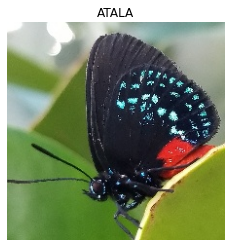

In [8]:
img = view_random_image(target_dir='butterfly_classification/train/',
                            target_class='ATALA')

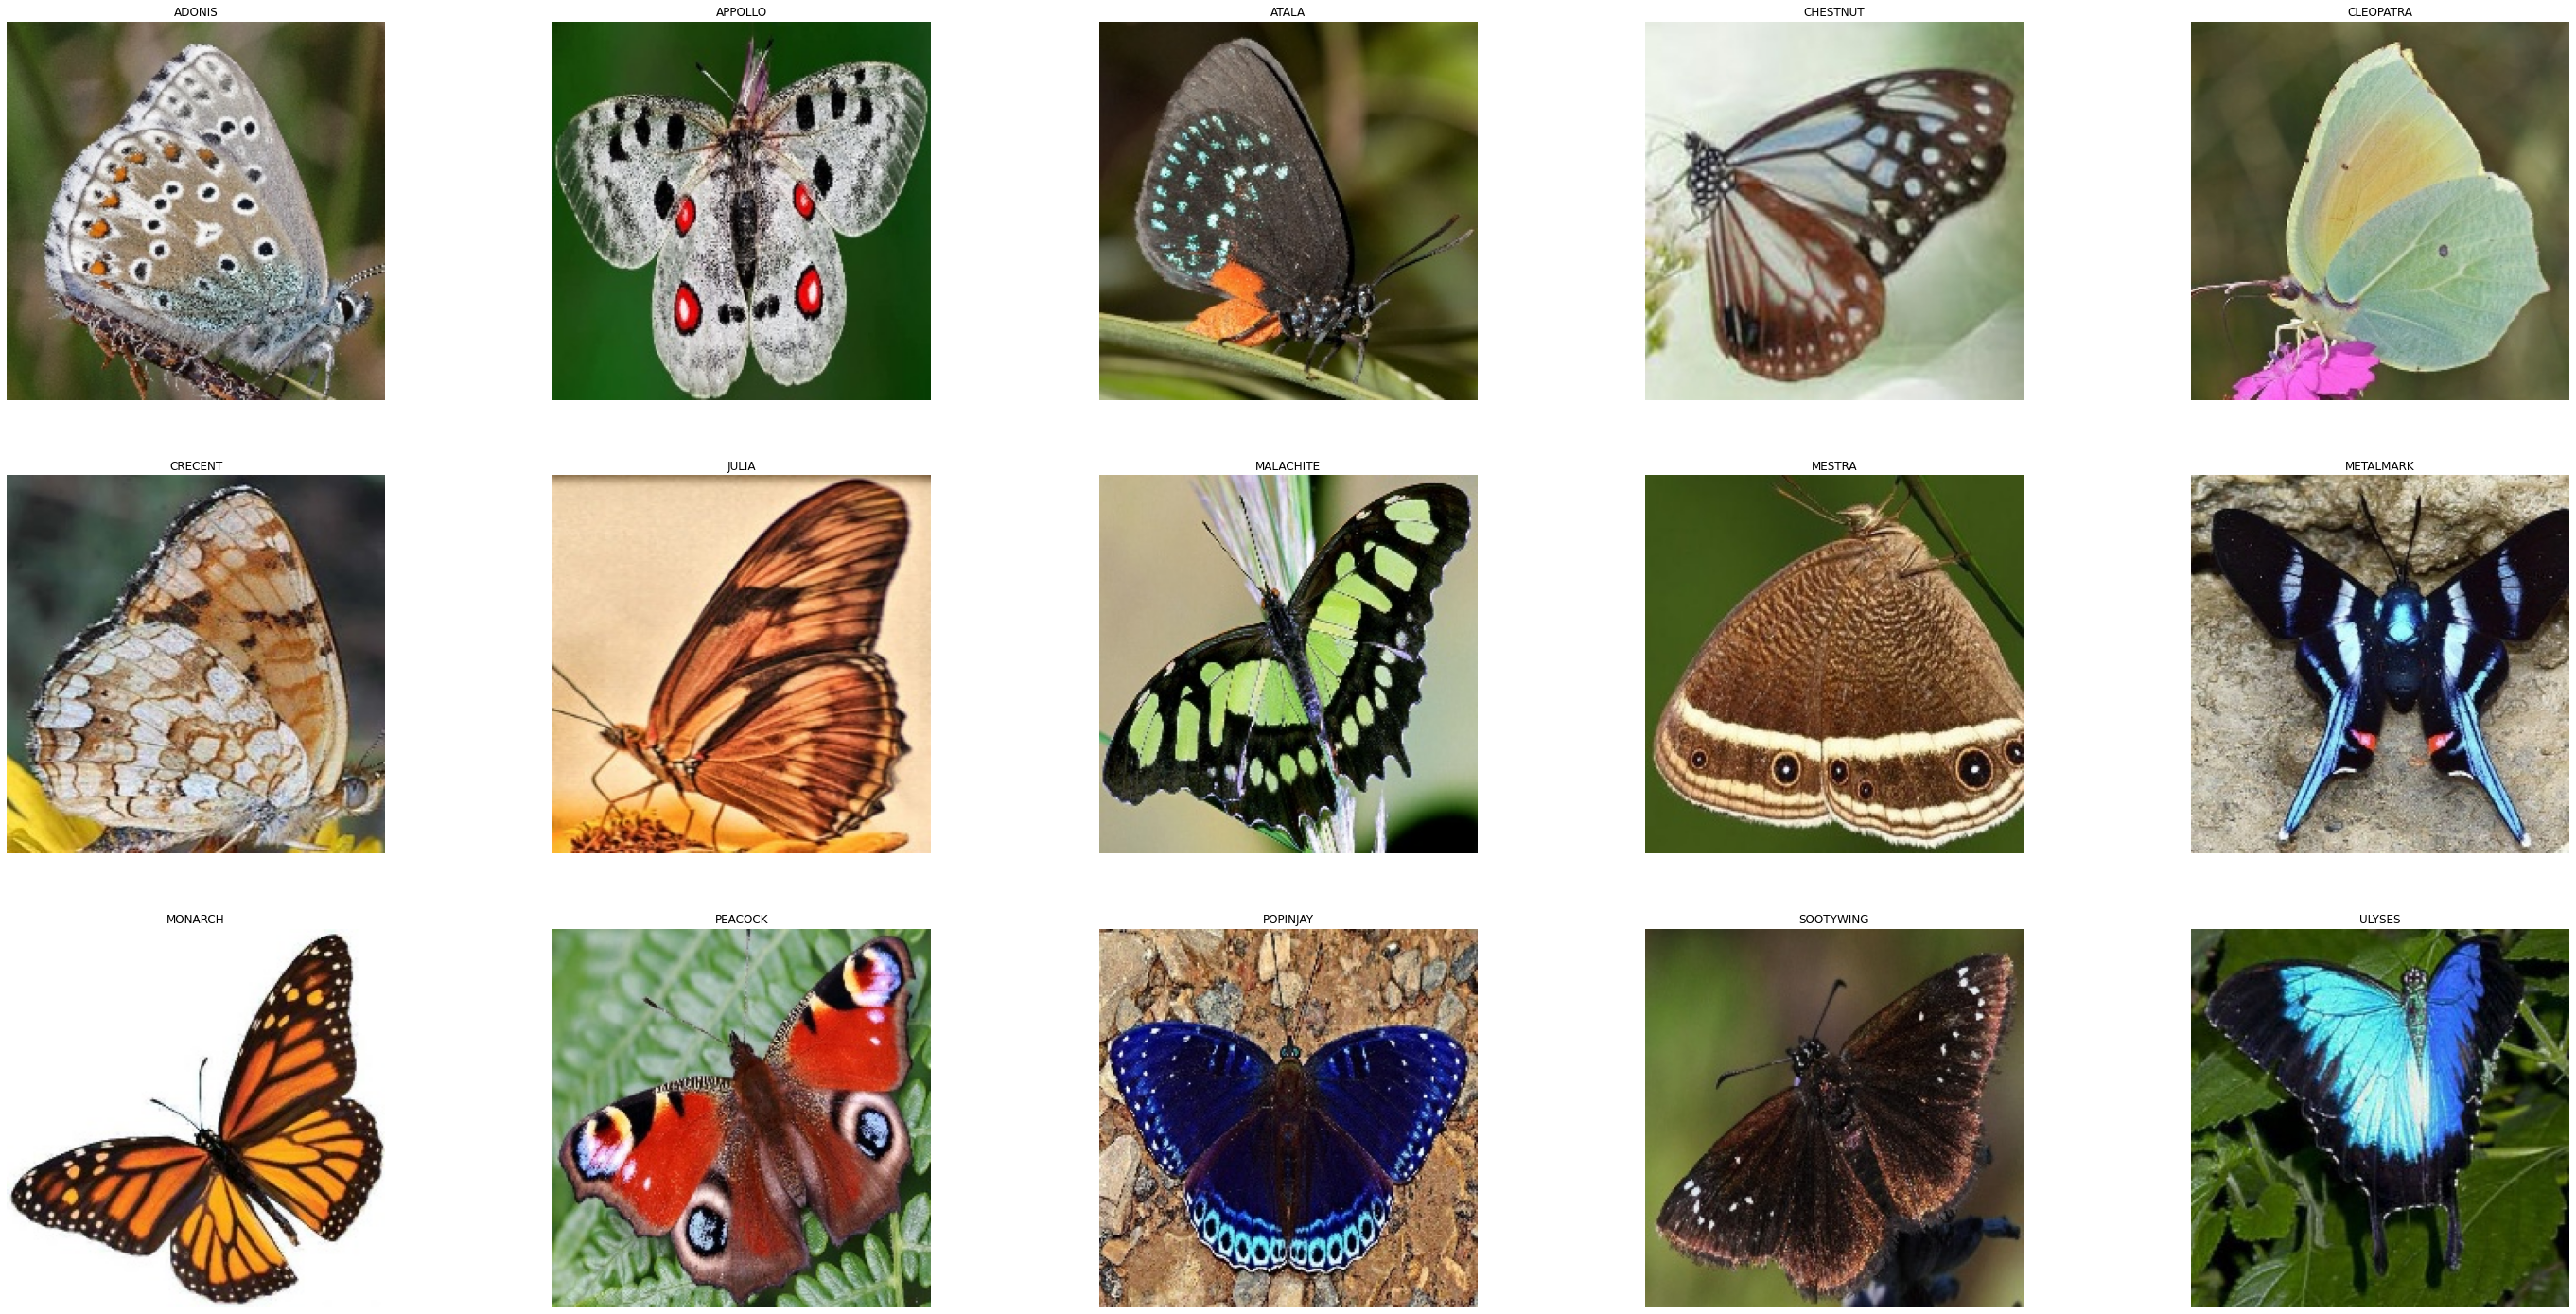

In [9]:
test_dir='butterfly_classification/valid'
classes=len(os.listdir(test_dir))
fig = plt.figure(figsize=(50,25))
if classes % 5==0:
    rows=int(classes/6)
else:
    rows=int(classes/6) +1
for row in range(rows):
    for column in range(5):
        i= row * 5 + column 
        if i>classes-1:
            break            
        specie=species_list[i]
        species_path=os.path.join(test_dir, specie)
        f_path=os.path.join(species_path, '1.jpg')        
        img = mpimg.imread(f_path)
        a = fig.add_subplot(rows, 5, i+1)
        imgplot=plt.imshow(img)
        a.axis("off")
        a.set_title(specie)	

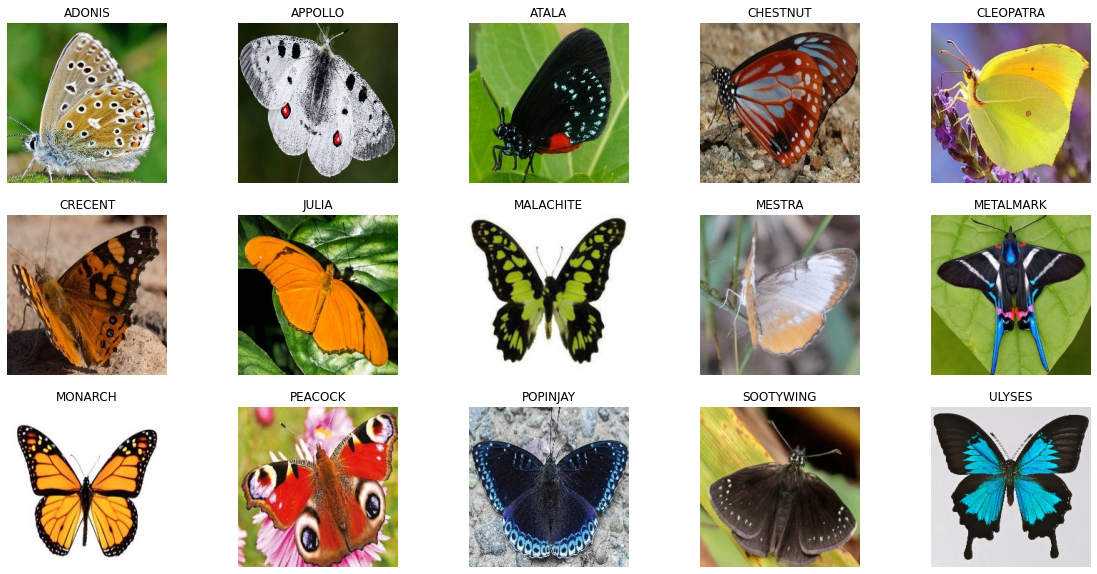

In [10]:
# Menampilkan gambar pertama yang ada di folder test

test_dir='butterfly_classification/test'
classes=len(os.listdir(test_dir))
fig = plt.figure(figsize=(20,10))
if classes % 5==0:
    rows=int(classes/6)
else:
    rows=int(classes/6) +1
for row in range(rows):
    for column in range(5):
        i= row * 5 + column 
        if i>classes-1:
            break            
        specie=species_list[i]
        species_path=os.path.join(test_dir, specie)
        f_path=os.path.join(species_path, '1.jpg')        
        img = mpimg.imread(f_path)
        a = fig.add_subplot(rows, 5, i+1)
        imgplot=plt.imshow(img)
        a.axis("off")
        a.set_title(specie)	

# **Data Loading**

In [11]:
tf.random.set_seed(44)

# deklarasikan objek
train_datagen = ImageDataGenerator(rescale=1./255)
train_datagen_augmented = ImageDataGenerator(rescale=1./255,
                                             rotation_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)
valid_datagen = ImageDataGenerator(rescale=1./255)

# set direktori
train_dir = 'butterfly_classification/train/'
val_dir = 'butterfly_classification/valid/'

# set data generator
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode='categorical',
                                               seed=33)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode='categorical',
                                               seed=33)

valid_data = valid_datagen.flow_from_directory(val_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode='categorical',
                                               seed=33)

Found 1973 images belonging to 16 classes.
Found 1973 images belonging to 16 classes.
Found 80 images belonging to 16 classes.


# **Model Definition**

In [14]:
model = Sequential([
        Conv2D(35, 3, activation='relu', input_shape=(224, 224, 3)),
        Dropout(rate=0.01),
        MaxPool2D(2),
        Conv2D(30, 3, activation='relu'),
        Dropout(rate=0.01),
        MaxPool2D(2),
        Conv2D(25, 3, activation='relu'),
        Dropout(rate=0.01),
        MaxPool2D(2),
        Conv2D(20, 3, activation='relu'),
        Dropout(rate=0.01),
        MaxPool2D(2),
        Conv2D(14, 3, activation='relu'),
        Dropout(rate=0.01),
        MaxPool2D(2),
        Flatten(),
        Dense(16, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 222, 222, 35)      980       
                                                                 
 dropout_5 (Dropout)         (None, 222, 222, 35)      0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 111, 111, 35)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 109, 109, 30)      9480      
                                                                 
 dropout_6 (Dropout)         (None, 109, 109, 30)      0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 54, 54, 30)       0         
 2D)                                                  

# **Model Training**

In [15]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

history = model.fit(train_data,
                    epochs=30,
                    validation_data=valid_data)

Epoch 1/30
62/62 [==============================] - 88s 1s/step - loss: 2.4955 - accuracy: 0.1515 - val_loss: 1.9544 - val_accuracy: 0.2750
Epoch 2/30
62/62 [==============================] - 90s 1s/step - loss: 1.5548 - accuracy: 0.4678 - val_loss: 1.4079 - val_accuracy: 0.5125
Epoch 3/30
62/62 [==============================] - 89s 1s/step - loss: 1.1205 - accuracy: 0.6183 - val_loss: 1.3058 - val_accuracy: 0.5125
Epoch 4/30
62/62 [==============================] - 91s 1s/step - loss: 0.9398 - accuracy: 0.6888 - val_loss: 1.1167 - val_accuracy: 0.6375
Epoch 5/30
62/62 [==============================] - 93s 2s/step - loss: 0.7350 - accuracy: 0.7587 - val_loss: 1.1319 - val_accuracy: 0.6500
Epoch 6/30
62/62 [==============================] - 93s 1s/step - loss: 0.7166 - accuracy: 0.7638 - val_loss: 0.8300 - val_accuracy: 0.7125
Epoch 7/30
62/62 [==============================] - 94s 2s/step - loss: 0.5491 - accuracy: 0.8256 - val_loss: 0.8499 - val_accuracy: 0.7375
Epoch 8/30
62/62 [==

<AxesSubplot:>

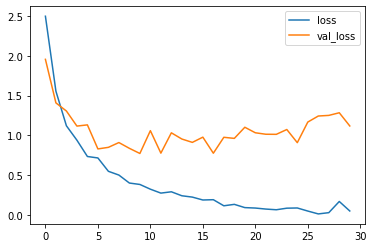

In [16]:
metrics = pd.DataFrame(history.history)
metrics[['loss', 'val_loss']].plot()

<AxesSubplot:>

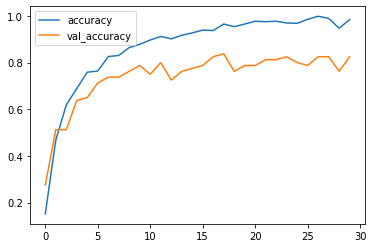

In [17]:
metrics[['accuracy', 'val_accuracy']].plot()

In [18]:
train_data.class_indices

{'ADONIS': 0,
 'APPOLLO': 1,
 'ATALA': 2,
 'CHESTNUT': 3,
 'CLEOPATRA': 4,
 'CRECENT': 5,
 'JULIA': 6,
 'MALACHITE': 7,
 'MESTRA': 8,
 'METALMARK': 9,
 'MONARCH': 10,
 'PEACOCK': 11,
 'POPINJAY': 12,
 'SOOTYWING': 13,
 'ULYSES': 14,
 'VICEROY': 15}

## Model Evaluation

### Gambar 1

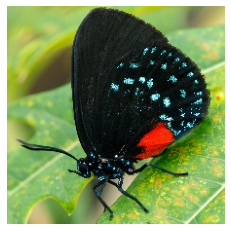

In [19]:
test_butterfly_1 = mpimg.imread('butterfly_classification/test/ATALA/4.jpg')
plt.imshow(test_butterfly_1);
plt.axis(False);

In [20]:
def load_and_preprocess(filename, img_shape=224):
  img = read_file(filename)
  img = decode_image(img, channels=3)
  img = resize(img, size=[img_shape, img_shape])
  img = img/255.
  return img

In [21]:
test_butterfly_1 = load_and_preprocess('butterfly_classification/test/ATALA/4.jpg')
test_butterfly_1.shape

TensorShape([224, 224, 3])

In [22]:
from tensorflow import expand_dims
# benerin dimensi
test_butterfly_1 = expand_dims(test_butterfly_1, axis=0)
test_butterfly_1.shape

TensorShape([1, 224, 224, 3])

In [23]:
res_butterfly_1 = model.predict(test_butterfly_1)
res_butterfly_1.argmax()

2

#### Gambar 2

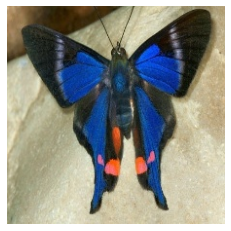

In [24]:
test_butterfly_2 = mpimg.imread('butterfly_classification/test/METALMARK/4.jpg')
plt.imshow(test_butterfly_2);
plt.axis(False);

In [25]:
test_butterfly_2 = load_and_preprocess('butterfly_classification/test/METALMARK/2.jpg')
test_butterfly_2 = expand_dims(test_butterfly_2, axis=0)
res_butterfly_2 = model.predict(test_butterfly_2)
res_butterfly_2.argmax()

9

#### Gambar 3

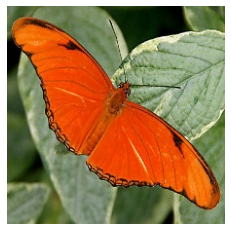

In [26]:
test_butterfly_3 = mpimg.imread('butterfly_classification/test/JULIA/3.jpg')
plt.imshow(test_butterfly_3);
plt.axis(False);

In [27]:
test_butterfly_3 = load_and_preprocess('butterfly_classification/test/JULIA/3.jpg')
test_butterfly_3 = expand_dims(test_butterfly_3, axis=0)
res_butterfly_3 = model.predict(test_butterfly_3)
res_butterfly_3.argmax()

6

#### Gambar 4

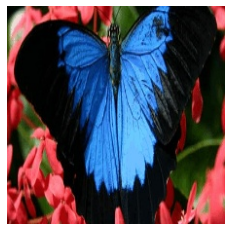

In [28]:
test_butterfly_4 = mpimg.imread('butterfly_classification/test/ULYSES/4.jpg')
plt.imshow(test_butterfly_4);
plt.axis(False);

In [29]:
test_butterfly_4 = load_and_preprocess('butterfly_classification/test/ULYSES/4.jpg')
test_butterfly_4 = expand_dims(test_butterfly_4, axis=0)
res_butterfly_4 = model.predict(test_butterfly_4)
res_butterfly_4.argmax()

14

#### Gambar 5

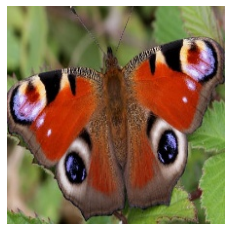

In [30]:
test_butterfly_5 = mpimg.imread('butterfly_classification/test/PEACOCK/5.jpg')
plt.imshow(test_butterfly_5);
plt.axis(False);

In [31]:
test_butterfly_5 = load_and_preprocess('butterfly_classification/test/PEACOCK/5.jpg')
test_butterfly_5 = expand_dims(test_butterfly_5, axis=0)
res_butterfly_5 = model.predict(test_butterfly_5)
res_butterfly_5.argmax()

11

In [32]:
train_data.class_indices

{'ADONIS': 0,
 'APPOLLO': 1,
 'ATALA': 2,
 'CHESTNUT': 3,
 'CLEOPATRA': 4,
 'CRECENT': 5,
 'JULIA': 6,
 'MALACHITE': 7,
 'MESTRA': 8,
 'METALMARK': 9,
 'MONARCH': 10,
 'PEACOCK': 11,
 'POPINJAY': 12,
 'SOOTYWING': 13,
 'ULYSES': 14,
 'VICEROY': 15}

# **Transfer Learning**

In [33]:

base = MobileNetV2(weights = 'imagenet', include_top = False, input_shape = (224, 224, 3))
tf.keras.backend.clear_session()
    
for layer in base.layers:
    layer.trainable =  False

mobilenet_model = Sequential()
mobilenet_model.add(base)
mobilenet_model.add(GlobalAveragePooling2D())
mobilenet_model.add(Dense(100, activation='relu'))
mobilenet_model.add(Dropout(0.1))
mobilenet_model.add(Dense(16, activation='softmax'))

In [34]:
mobilenet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 100)               128100    
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 16)                1616      
                                                                 
Total params: 2,387,700
Trainable params: 129,716
Non-tr

In [35]:
mobilenet_model.compile(optimizer=Adam(learning_rate=0.0001),
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

tl_model = mobilenet_model.fit(train_data_augmented,
                            epochs=30,
                            validation_data=valid_data)  

Epoch 1/30
62/62 [==============================] - 46s 727ms/step - loss: 2.4596 - accuracy: 0.2387 - val_loss: 1.9616 - val_accuracy: 0.4750
Epoch 2/30
62/62 [==============================] - 44s 706ms/step - loss: 1.6290 - accuracy: 0.5778 - val_loss: 1.3018 - val_accuracy: 0.7875
Epoch 3/30
62/62 [==============================] - 43s 686ms/step - loss: 1.1261 - accuracy: 0.7395 - val_loss: 0.9268 - val_accuracy: 0.8500
Epoch 4/30
62/62 [==============================] - 44s 704ms/step - loss: 0.8120 - accuracy: 0.8120 - val_loss: 0.6943 - val_accuracy: 0.8875
Epoch 5/30
62/62 [==============================] - 41s 657ms/step - loss: 0.6335 - accuracy: 0.8550 - val_loss: 0.5464 - val_accuracy: 0.9125
Epoch 6/30
62/62 [==============================] - 41s 655ms/step - loss: 0.5341 - accuracy: 0.8738 - val_loss: 0.4514 - val_accuracy: 0.9125
Epoch 7/30
62/62 [==============================] - 42s 667ms/step - loss: 0.4574 - accuracy: 0.8890 - val_loss: 0.3887 - val_accuracy: 0.9250

<AxesSubplot:>

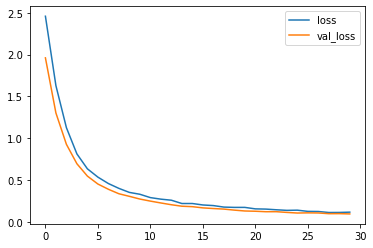

In [36]:
metrics_2 = pd.DataFrame(tl_model.history)
metrics_2[['loss', 'val_loss']].plot()

<AxesSubplot:>

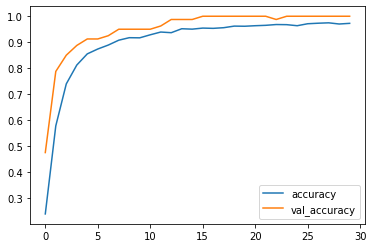

In [37]:
metrics_2[['accuracy', 'val_accuracy']].plot()

# **Model Evaluation Transfer Learning**

In [38]:
res_butterfly_1_improve = mobilenet_model.predict(test_butterfly_1)
res_butterfly_1_improve.argmax()

2

In [39]:
res_butterfly_2_improve = mobilenet_model.predict(test_butterfly_2)
res_butterfly_2_improve.argmax()

9

In [40]:
res_butterfly_3_improve = mobilenet_model.predict(test_butterfly_3)
res_butterfly_3_improve.argmax()

6

In [41]:
res_butterfly_4_improve = mobilenet_model.predict(test_butterfly_4)
res_butterfly_4_improve.argmax()

14

In [42]:
res_butterfly_5_improve = mobilenet_model.predict(test_butterfly_5)
res_butterfly_5_improve.argmax()

11